##Ingestion

In [0]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [0]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/noahgift/real_estate_ml/master/data/Zip_Zhvi_SingleFamilyResidence_2018.csv")

##EDA

In [4]:
df_raw.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
count,15508.000,15508.000,15508.000,14338.000,14338.000,14338.000,14338.000,14338.000,14338.000,14338.000,...,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000
mean,80789.618,47683.566,7754.500,115889.866,116007.379,116123.051,116235.493,116358.920,116501.681,116689.315,...,279359.582,280672.685,282148.749,283446.447,284466.282,285500.200,286717.307,288029.320,289187.510,290106.635
std,31521.485,29008.034,4476.918,85115.825,85264.209,85413.118,85566.676,85744.243,85958.867,86230.630,...,361868.364,361360.576,363102.089,365301.815,366277.876,367095.613,366772.521,364624.171,361143.146,359132.687
min,58196.000,1001.000,1.000,11300.000,11500.000,11600.000,11800.000,11800.000,12000.000,12100.000,...,21700.000,21700.000,22100.000,22200.000,22000.000,21800.000,21700.000,21500.000,21600.000,21900.000
25%,67215.000,22199.000,3877.750,66700.000,66800.000,66925.000,67100.000,67200.000,67300.000,67500.000,...,128300.000,128800.000,129675.000,130300.000,131100.000,131900.000,132900.000,134000.000,135100.000,135600.000
50%,77886.500,45792.500,7754.500,96500.000,96700.000,96750.000,96900.000,96900.000,97000.000,97150.000,...,191100.000,192150.000,193400.000,194600.000,195700.000,196900.000,198100.000,199600.000,201100.000,202150.000
75%,90314.250,74010.250,11631.250,140500.000,140600.000,140600.000,140800.000,141000.000,141100.000,141300.000,...,310750.000,312300.000,314325.000,316100.000,317425.000,318325.000,319800.000,321200.000,322425.000,323900.000
max,753844.000,99901.000,15508.000,3676700.000,3704200.000,3729600.000,3754600.000,3781800.000,3813500.000,3849600.000,...,17724700.000,17408900.000,17450500.000,17722800.000,18006700.000,18273800.000,18331900.000,18131900.000,17594900.000,17119600.000


In [5]:
df_raw.rename(columns={"RegionName":"ZipCode"}, inplace=True)
df_raw["ZipCode"]=df_raw["ZipCode"].map(lambda x: "{:.0f}".format(x))
df_raw["RegionID"]=df_raw["RegionID"].map(lambda x: "{:.0f}".format(x))
df_raw.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.000,335400.000,336500.000,...,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.000,212200.000,212200.000,...,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.000,500900.000,503100.000,...,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300
3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.000,77300.000,77300.000,...,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.000,95600.000,95800.000,...,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700


In [6]:
median_prices = df_raw.median()
median_prices.tail()

2018-08   196900.000
2018-09   198100.000
2018-10   199600.000
2018-11   201100.000
2018-12   202150.000
dtype: float64

In [7]:
sf_df = df_raw[df_raw["City"] == "San Francisco"].median()
df_comparison = pd.concat([sf_df,median_prices], axis=1)
df_comparison.columns = ["San Francisco","Median USA"]
df_comparison.head()

,San Francisco,Median USA
RegionID,97572.000,77886.500
ZipCode,94118.000,45792.500
SizeRank,1315.000,7754.500
1996-04,306900.000,96500.000
1996-05,307600.000,96700.000


In [8]:
df = df_comparison.drop(['Median USA'],axis = 1)
df.head()

,San Francisco
RegionID,97572.000
ZipCode,94118.000
SizeRank,1315.000
1996-04,306900.000
1996-05,307600.000


In [9]:
df = df.iloc[3:]
df.head()

,San Francisco
1996-04,306900.000
1996-05,307600.000
1996-06,308400.000
1996-07,309300.000
1996-08,310500.000


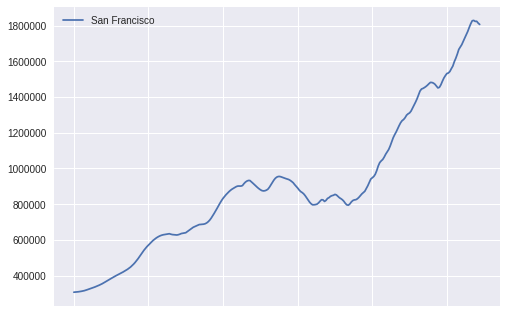

In [10]:
df.plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


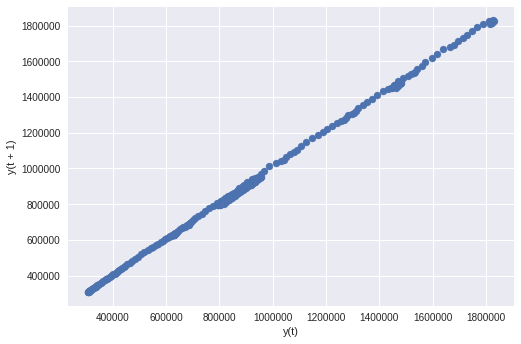

In [11]:
from pandas.tools.plotting import lag_plot
lag_plot(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


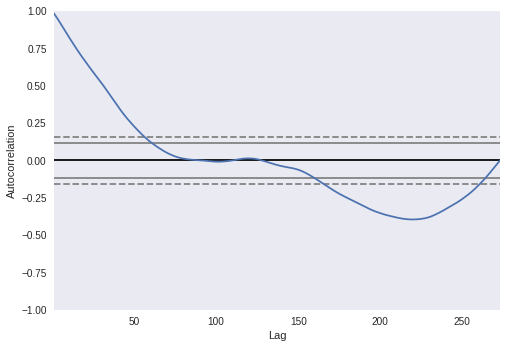

In [12]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df)

## Data modeling

15
predicted=1519810.927043, expected=1519500.000000
predicted=1531069.432742, expected=1531100.000000
predicted=1543532.559210, expected=1534200.000000
predicted=1532007.011373, expected=1542500.000000
predicted=1558128.799382, expected=1558400.000000
predicted=1573661.584511, expected=1572900.000000
predicted=1586798.183656, expected=1597500.000000
predicted=1625952.137821, expected=1616900.000000
predicted=1625288.829452, expected=1639900.000000
predicted=1670090.808569, expected=1666200.000000
predicted=1684660.147285, expected=1679500.000000
predicted=1687262.520092, expected=1693100.000000
predicted=1711661.606980, expected=1712400.000000
predicted=1729495.703608, expected=1730300.000000
predicted=1750744.850001, expected=1748300.000000
predicted=1761415.221611, expected=1766900.000000
predicted=1784956.848827, expected=1789300.000000
predicted=1814002.966297, expected=1809900.000000
predicted=1824785.816710, expected=1826600.000000
predicted=1841756.794732, expected=1828600.0000

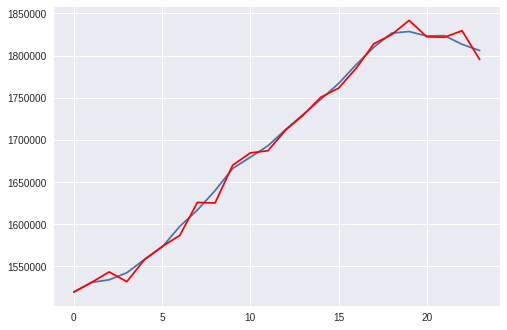

In [13]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
# split dataset
X = df.values
train, test = X[1:len(X)-24], X[len(X)-24:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
print(window)
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')

##Conclusion
Housing price data have obvious autocorrelation, and AR model can fit the data to a certain extent. The accuracy of prediction can be improved by improving the model or changing the form of data.